<a href="https://colab.research.google.com/github/alessandrossC/ML-for-people/blob/main/%22HW_2_1_%D0%9F%D0%BE%D0%B1%D1%83%D0%B4%D0%BE%D0%B2%D0%B0_%D0%BB%D1%96%D0%BD%D1%96%D0%B9%D0%BD%D0%BE%D1%97_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%97_%D0%B7%D0%B0_%D0%BE%D0%B4%D0%BD%D0%BE%D1%8E_%D0%BE%D0%B7%D0%BD%D0%B0%D0%BA%D0%BE%D1%8E_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
medical_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/medical-charges.csv') # замініть на ваш шлях до файлу
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
X = non_smoker_df['age'].values
y = non_smoker_df['charges'].values
X_with_intercept = np.column_stack((np.ones(X.shape[0]), X))

In [12]:
def normal_equations(X, y):
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta


MNK_coef = normal_equations(X_with_intercept, y)
MNK_coef

array([-2091.42055657,   267.24891283])

In [14]:
predictions_MNK = X_with_intercept.dot(MNK_coef)
predictions_MNK[:5]

array([2719.0598744 , 5391.54900271, 6727.79356686, 6460.54465403,
       6193.2957412 ])

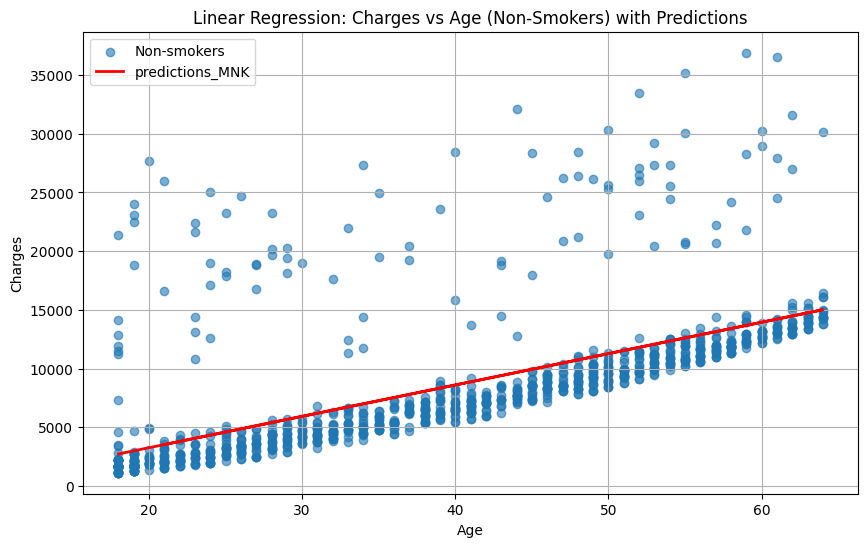

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.6, label='Non-smokers')
plt.plot(X, predictions_MNK, color='red', linewidth=2, label='predictions_MNK')
plt.title('Linear Regression: Charges vs Age (Non-Smokers) with Predictions')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
def full_batch_gradient_descent(X, y, lr=0.01, epochs=1000):
    m, b = 0.0, 0.0
    n = len(y)
    errors = []
    for _ in range(epochs):
        y_pred = m * X[:, 0] + b
        error = y_pred - y
        errors.append(sum(error**2))
        m_gradient = (2 / n) * np.dot(error, X[:, 0])
        b_gradient = (2 / n) * np.sum(error)
        m -= lr * m_gradient
        b -= lr * b_gradient
    return m, b, errors

m, b, errors = full_batch_gradient_descent(X_with_intercept[:, 1:], y, lr=0.01, epochs=1000)
predictions_fbgd = m * X_with_intercept[:, 1] + b

<ipython-input-19-49dafb5e44a5>:8: RuntimeWarning: overflow encountered in square
  errors.append(sum(error**2))
<ipython-input-19-49dafb5e44a5>:8: RuntimeWarning: overflow encountered in scalar add
  errors.append(sum(error**2))
<ipython-input-19-49dafb5e44a5>:11: RuntimeWarning: invalid value encountered in scalar subtract
  m -= lr * m_gradient


In [22]:
X_normalized = (X_with_intercept[:, 1] - np.mean(X_with_intercept[:, 1])) / np.std(X_with_intercept[:, 1])
y_normalized = (y - np.mean(y)) / np.std(y)
m, b, errors = full_batch_gradient_descent(X_normalized.reshape(-1, 1), y_normalized, lr=0.01, epochs=1000)
predictions_fbgd = m * X_normalized + b
m, b

(0.6279467827096054, -2.7692134299936175e-16)

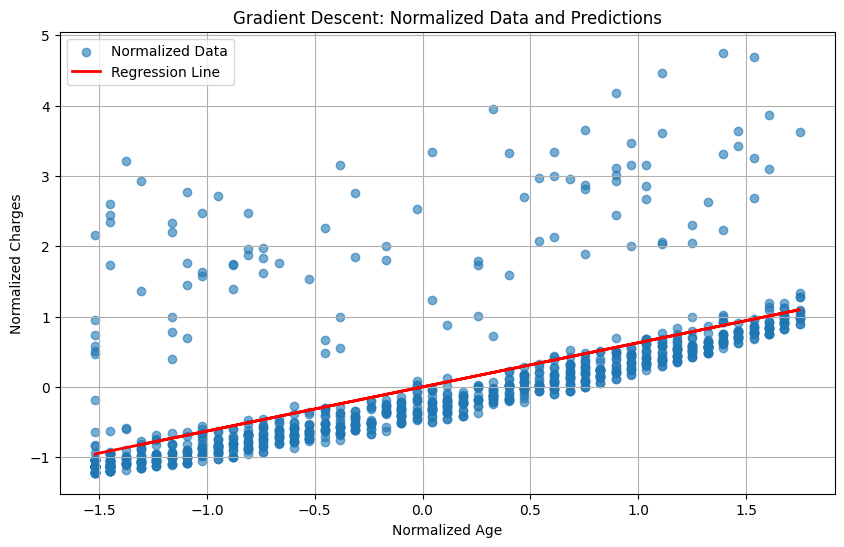

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(X_normalized, y_normalized, alpha=0.6, label='Normalized Data')
plt.plot(X_normalized, predictions_fbgd, color='red', linewidth=2, label='Regression Line')
plt.title('Gradient Descent: Normalized Data and Predictions')
plt.xlabel('Normalized Age')
plt.ylabel('Normalized Charges')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
X_df = X_with_intercept[:, 1].reshape(-1, 1)
y_df = y

In [44]:
lin_reg = LinearRegression()
lin_reg.fit(X_df, y_df)

LinearRegression()

In [45]:
predictions_sklearn = lin_reg.predict(X_df)

In [61]:
m_sklearn = lin_reg.coef_[0]
b_sklearn = lin_reg.intercept_
m_sklearn, b_sklearn

(267.2489128311997, -2091.4205565650864)

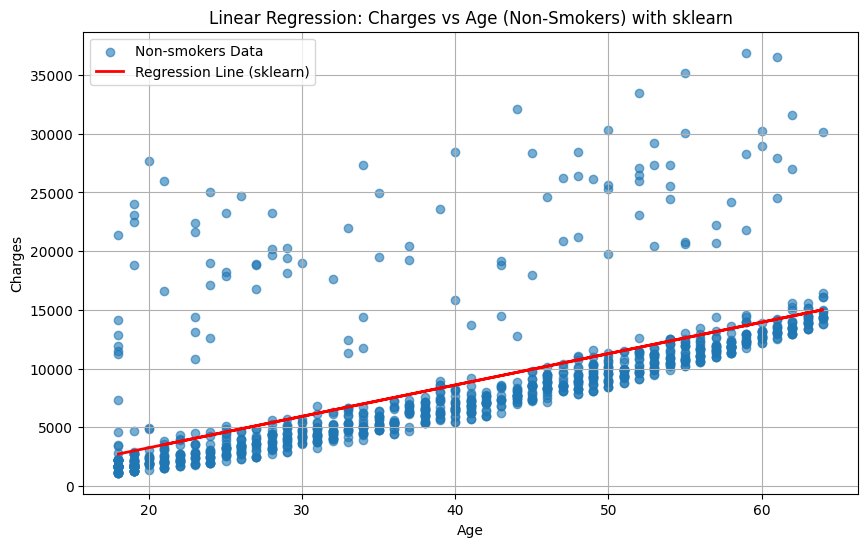

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(X_df, y_df, alpha=0.6, label='Non-smokers Data')
plt.plot(X_df, predictions_sklearn, color='red', linewidth=2, label='Regression Line (sklearn)')
plt.title('Linear Regression: Charges vs Age (Non-Smokers) with sklearn')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
from sklearn.metrics import mean_squared_error

In [62]:
def calculate_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# 1. Метод: Градієнтний спуск (нормалізовані дані)
m_gd, b_gd, _ = full_batch_gradient_descent(
    X_normalized.reshape(-1, 1), y_normalized, lr=0.01, epochs=1000
)
predictions_gd = m_gd * X_normalized + b_gd
rmse_gd = calculate_rmse(y_normalized, predictions_gd)

# 2. Метод: Нормальні рівняння
predictions_ne = X_with_intercept.dot(MNK_coef)
rmse_ne = calculate_rmse(y, predictions_ne)

# 3. Метод: sklearn.LinearRegression
predictions_sklearn = lin_reg.predict(X_df)
rmse_sklearn = calculate_rmse(y, predictions_sklearn)

print(f"1. Метод: Градієнтний спуск (нормалізовані дані): m = {m_gd}, b = {b_gd}, RMSE = {rmse_gd}")
print(f"2. Метод: Нормальні рівняння: RMSE = {rmse_ne}")
print(f"3. Метод: sklearn.LinearRegression: RMSE = {rmse_sklearn}")

1. Метод: Градієнтний спуск (нормалізовані дані): m = 0.6279467827096054, b = -2.7692134299936175e-16, RMSE = 0.7782562796132193
2. Метод: Нормальні рівняння: RMSE = 4662.505766636395
3. Метод: sklearn.LinearRegression: RMSE = 4662.505766636395


In [55]:
predictions_df.head()

,Gradient Descent (Normalized),Normal Equations,Sklearn Linear Regression
0,-0.953971,2719.059874,2719.059874
1,-0.507885,5391.549003,5391.549003
2,-0.284841,6727.793567,6727.793567
3,-0.329450,6460.544654,6460.544654
4,-0.374059,6193.295741,6193.295741


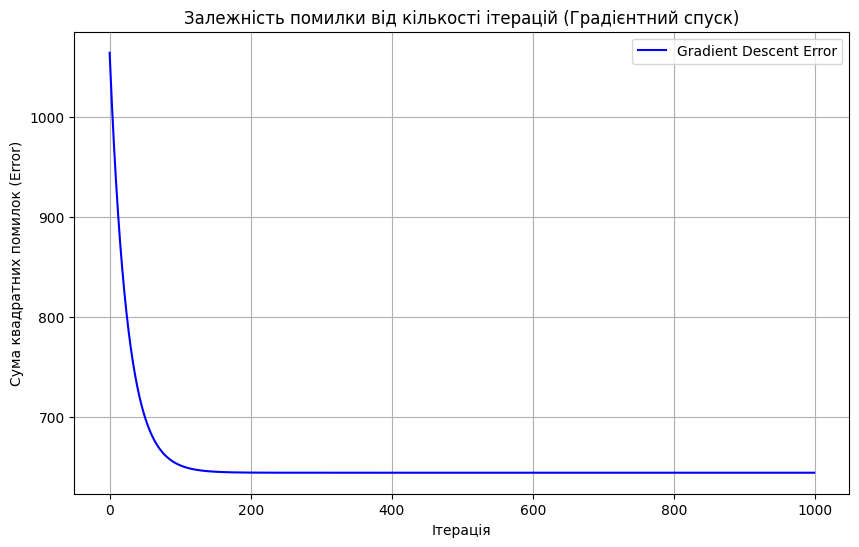

In [59]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(errors)), errors, color='blue', label='Gradient Descent Error')
plt.title('Залежність помилки від кількості ітерацій (Градієнтний спуск)')
plt.xlabel('Ітерація')
plt.ylabel('Сума квадратних помилок (Error)')
plt.legend()
plt.grid(True)
plt.show()

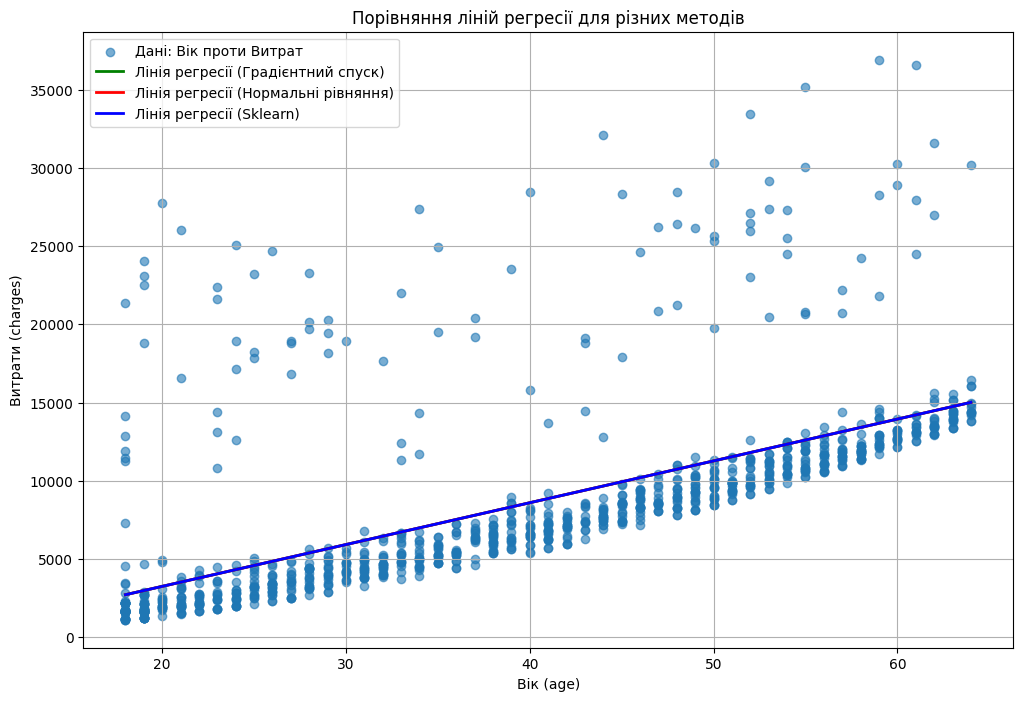

In [65]:
gd_line_x = np.linspace(X.min(), X.max(), 100)
gd_line_y = m_gd * (gd_line_x - np.mean(X)) / np.std(X) + b_gd
gd_line_y = gd_line_y * np.std(y) + np.mean(y)
ne_line_x = np.linspace(X.min(), X.max(), 100)
ne_line_y = MNK_coef[0] + MNK_coef[1] * ne_line_x
sklearn_line_y = lin_reg.predict(ne_line_x.reshape(-1, 1))

plt.figure(figsize=(12, 8))
plt.scatter(X, y, alpha=0.6, label='Дані: Вік проти Витрат')
plt.plot(gd_line_x, gd_line_y, color='green', label='Лінія регресії (Градієнтний спуск)', linewidth=2)
plt.plot(ne_line_x, ne_line_y, color='red', label='Лінія регресії (Нормальні рівняння)', linewidth=2)
plt.plot(ne_line_x, sklearn_line_y, color='blue', label='Лінія регресії (Sklearn)', linewidth=2)

plt.title('Порівняння ліній регресії для різних методів')
plt.xlabel('Вік (age)')
plt.ylabel('Витрати (charges)')
plt.legend()
plt.grid(True)
plt.show()

Усі три методи дають практично ідентичні лінії регресії.
Це підтверджує, що параметри моделей, знайдені різними методами, є близькими й точними.

 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

In [68]:
from sklearn.metrics import r2_score

In [67]:
smoker_df = medical_df[medical_df['smoker'] == 'yes']

In [69]:
X_smoker = smoker_df['age'].values.reshape(-1, 1)
y_smoker = smoker_df['charges'].values

lin_reg_smoker = LinearRegression()
lin_reg_smoker.fit(X_smoker, y_smoker)

m_smoker = lin_reg_smoker.coef_[0]
b_smoker = lin_reg_smoker.intercept_

predictions_smoker = lin_reg_smoker.predict(X_smoker)
rmse_smoker = calculate_rmse(y_smoker, predictions_smoker)
rmse_smoker = np.sqrt(mean_squared_error(y_smoker, predictions_smoker))
r2_smoker = r2_score(y_smoker, predictions_smoker)
m_smoker, b_smoker, rmse_smoker, r2_smoker

(305.2376021098288, 20294.128126915966, 10711.00334810241, 0.13558924096084068)

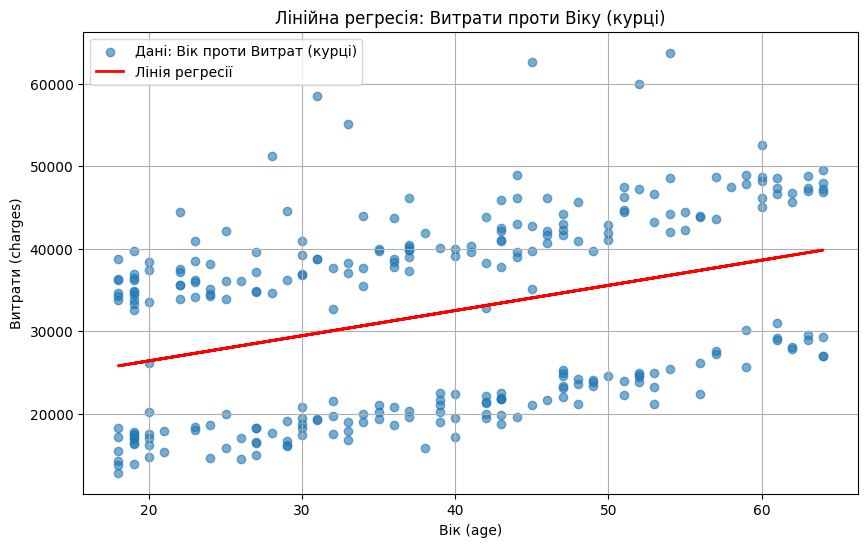

In [70]:
plt.figure(figsize=(10, 6))
plt.scatter(X_smoker, y_smoker, alpha=0.6, label='Дані: Вік проти Витрат (курці)')
plt.plot(X_smoker, predictions_smoker, color='red', label='Лінія регресії', linewidth=2)
plt.title('Лінійна регресія: Витрати проти Віку (курці)')
plt.xlabel('Вік (age)')
plt.ylabel('Витрати (charges)')
plt.legend()
plt.grid(True)
plt.show()

Лінія регресії демонструє позитивний зв’язок між віком і витратами для курців, але дані досить розкидані.
Низьке значення R2 вказує на слабке пояснення варіації витрат лише за віком.
Високе RMSE свідчить про значну похибку моделі.
Рекомендація:
Ця модель недостатньо точна для використання у компанії. Витрати, ймовірно, залежать від інших факторів.